# Wine Quality Prediction 
#### [ Random Forest Algorithm, Decision Tree Algorithm ] 
BY PRAVEEN K S    
[My linkedin profile kspraveen20](https://in.linkedin.com/in/kspraveen20)     
[My Github profile 0xlightning](https://github.com/0xlightning/)

In [1]:
# Importing libraries
import numpy as np
import pandas as pd

In [2]:
# Data Visualization libraries 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.shape

(1599, 12)

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

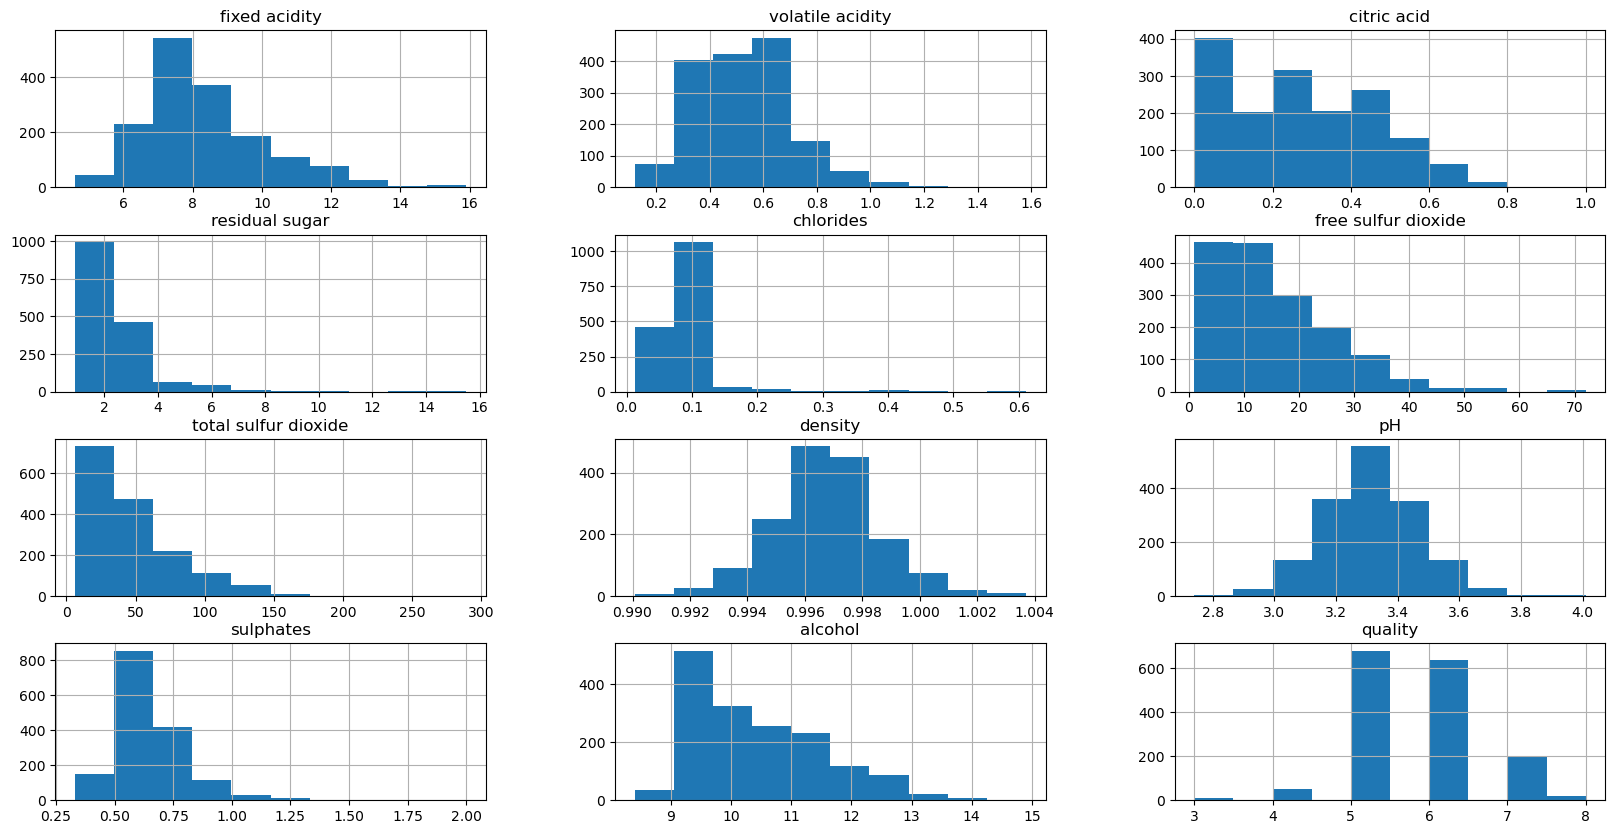

In [8]:
df.hist(figsize=(20,10));

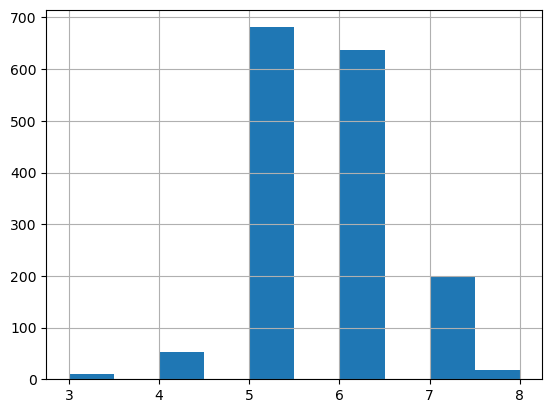

In [9]:
# the quality column
df["quality"].hist();

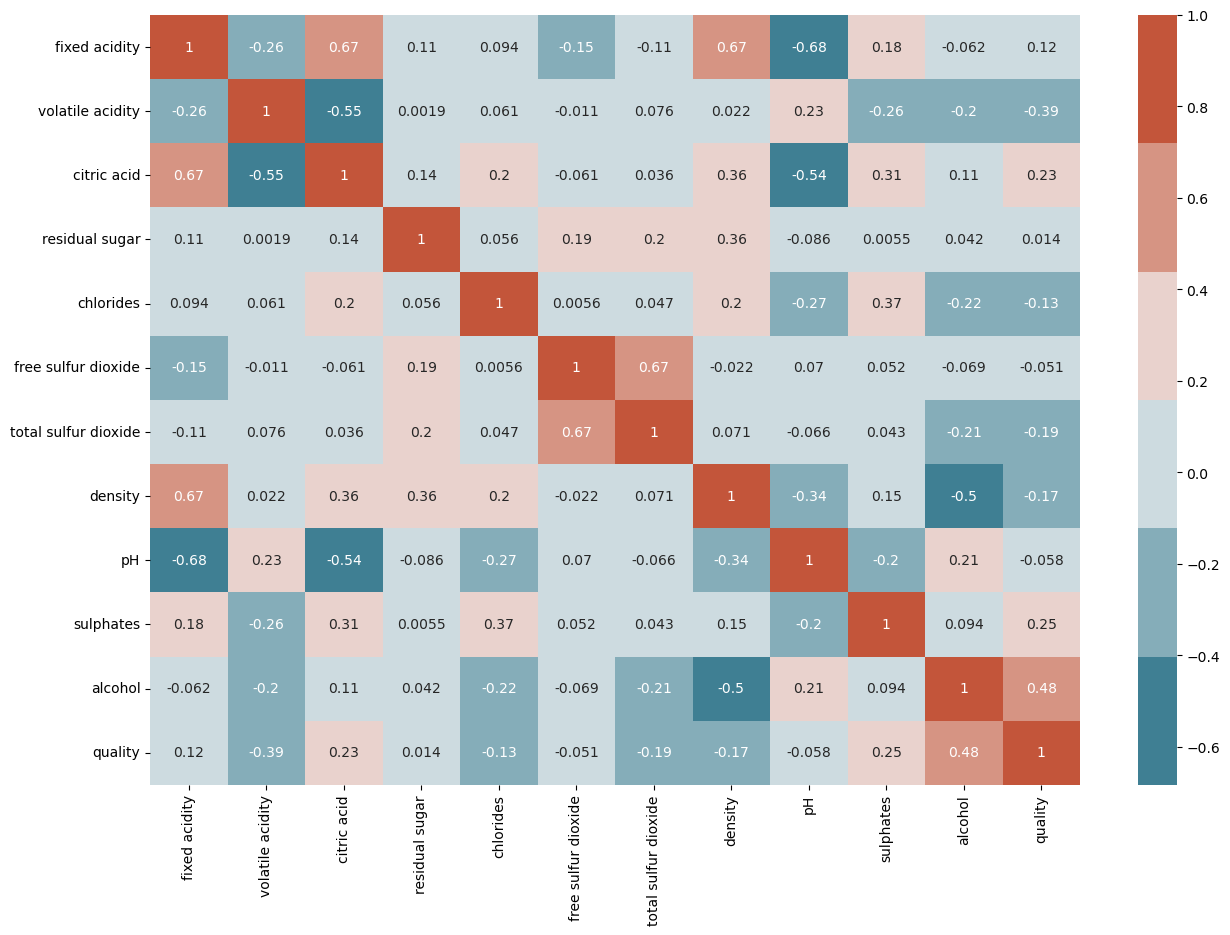

In [10]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20));

In [11]:
# Normalize the dataframe into -1 to 1 range
X = df.iloc[:,:-1].values

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

df.quality = [1 if x >= 5 else 0 for x in df['quality']]
y = df.quality

In [12]:
X

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [13]:
y.unique()

array([1, 0], dtype=int64)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
X_train

array([[-0.75817179,  0.90601191, -1.03201904, ...,  0.44633676,
        -0.34315421,  0.82323162],
       [-0.06873526, -0.7140663 ,  0.20039205, ..., -0.46076217,
         0.18796348,  0.16616088],
       [ 0.44834214, -1.32857872,  0.30309297, ..., -0.33117661,
         1.07315963,  1.19870062],
       ...,
       [-0.70071875, -0.37887771, -0.67256581, ...,  0.3167512 ,
        -0.99229806,  0.26002813],
       [ 1.13777868,  0.01217565,  1.0733499 , ..., -1.23827555,
        -0.40216729, -1.05411336],
       [-0.6432657 ,  0.79428237, -1.39147228, ...,  0.70550789,
         0.36500271,  0.63549713]])

In [15]:
y_train

1117    1
1218    1
1002    1
437     1
156     1
       ..
577     1
918     1
827     1
305     1
1399    1
Name: quality, Length: 1279, dtype: int64

In [16]:
df_temp = df[df['quality']==1]
df_temp.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.0
mean,8.338021,0.519766,0.274967,2.532812,0.087128,16.031250,46.960938,0.996749,3.308118,0.660853,10.431478,1.0
std,1.742808,0.171017,0.193294,1.395909,0.045554,10.486054,33.048411,0.001896,0.152798,0.166414,1.070688,0.0
min,4.700000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.370000,8.400000,1.0
25%,7.100000,0.390000,0.100000,1.900000,0.070000,8.000000,22.000000,0.995600,3.210000,0.550000,9.500000,1.0
50%,7.900000,0.510000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996755,3.310000,0.620000,10.200000,1.0
75%,9.300000,0.630000,0.430000,2.600000,0.090000,22.000000,63.000000,0.997853,3.400000,0.730000,11.100000,1.0
max,15.900000,1.330000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,1.980000,14.900000,1.0


In [17]:
df_temp = df[df['quality']==0]
df_temp.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.0
mean,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,0.0
std,1.649284,0.247970,0.207406,1.723735,0.075121,9.076508,26.395123,0.001667,0.175100,0.224323,0.918178,0.0
min,4.600000,0.230000,0.000000,1.200000,0.045000,3.000000,7.000000,0.993400,2.740000,0.330000,8.400000,0.0
25%,6.800000,0.565000,0.020000,1.900000,0.068500,5.000000,13.500000,0.995655,3.300000,0.495000,9.600000,0.0
50%,7.500000,0.680000,0.080000,2.100000,0.080000,9.000000,26.000000,0.996600,3.380000,0.560000,10.000000,0.0
75%,8.400000,0.882500,0.270000,2.950000,0.094500,15.500000,48.000000,0.997700,3.500000,0.600000,11.000000,0.0
max,12.500000,1.580000,1.000000,12.900000,0.610000,41.000000,119.000000,1.001000,3.900000,2.000000,13.100000,0.0


# Decision Tree Classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
print(dtc.score(X_test,y_test))
print(classification_report(y_test, dtc_pred))
print(confusion_matrix(y_test,dtc_pred))

0.953125
              precision    recall  f1-score   support

           0       0.17      0.29      0.21         7
           1       0.98      0.97      0.98       313

    accuracy                           0.95       320
   macro avg       0.58      0.63      0.59       320
weighted avg       0.97      0.95      0.96       320

[[  2   5]
 [ 10 303]]


# Random Forest Classifier


In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test, rfc_pred))
print(rfc.score(X_test,y_test))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.98      0.99      0.98       313

    accuracy                           0.97       320
   macro avg       0.49      0.50      0.49       320
weighted avg       0.96      0.97      0.96       320

0.96875
[[  0   7]
 [  3 310]]


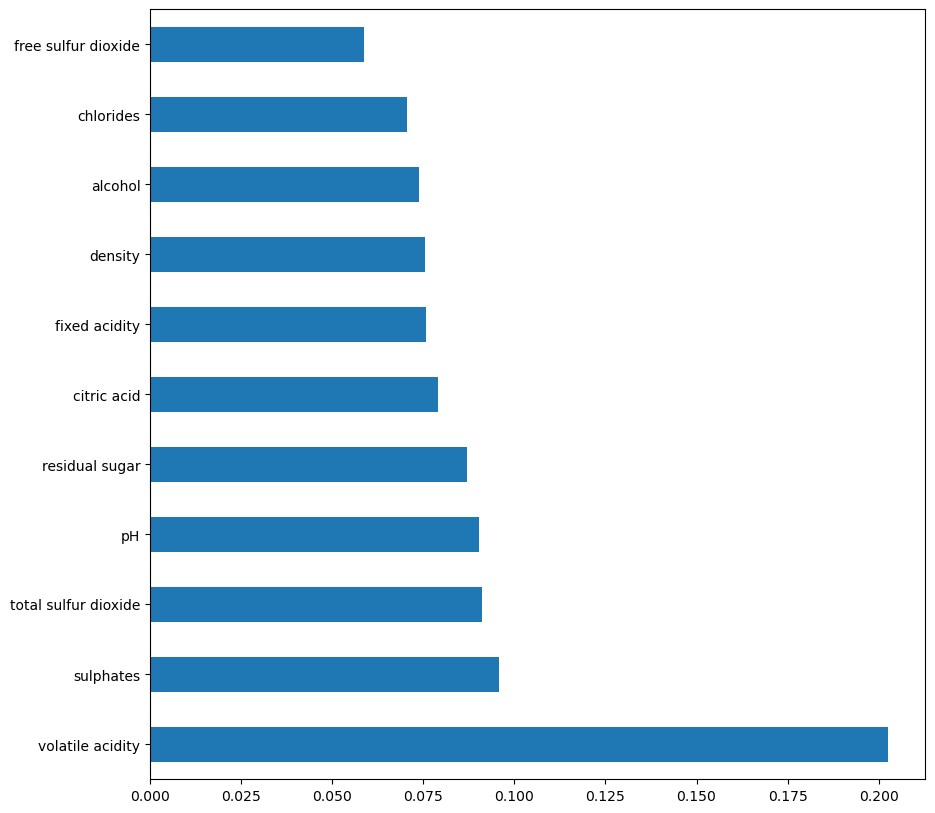

In [21]:
X_features = df.drop('quality', axis = 1)
feat_importances = pd.Series(rfc.feature_importances_,index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))
plt.title;

In [22]:
X_test

array([[ 1.08032563, -1.10511966,  0.97064898, ..., -1.36786111,
        -1.05131114, -0.02157362],
       [-0.47090657, -0.7140663 , -0.77526673, ...,  0.38154398,
         0.24697655, -0.11544087],
       [-0.01128221,  0.54289093, -0.36446304, ..., -0.97910442,
         2.72552578, -1.24184785],
       ...,
       [ 3.09118219, -0.63026915,  2.10035914, ..., -1.62703223,
         0.83710732, -0.39704261],
       [ 1.25268477, -1.38444349,  1.22740129, ..., -0.7199333 ,
         1.36822502, -0.96024611],
       [-0.41345352, -0.546472  ,  0.09769112, ...,  0.57592232,
        -0.10710191, -0.86637886]])

In [23]:
type(X_test),X_test[0]

(numpy.ndarray,
 array([ 1.08032563, -1.10511966,  0.97064898, -0.45321841, -0.13743808,
        -0.94434636, -1.13935687, -0.24734635, -1.36786111, -1.05131114,
        -0.02157362]))

In [24]:
X_test.shape,X_test.ndim

((320, 11), 2)

In [25]:
new_data = [[10.8,0.88,0.00,9.6,0.098,25.0,67.0,0.9968,8.20,0.68,9.8]]
new_data_array = np.array(new_data)
new_data_array = StandardScaler().fit_transform(new_data_array)
if rfc.predict(new_data_array) == 1:
    print("Quality of Vine Is Good")
else :
    print("Quality of Vine is not Good")

Quality of Vine Is Good


# BY PRAVEEN K S 
[My linkedin profile kspraveen20](https://in.linkedin.com/in/kspraveen20)
[My Github profile 0xlightning](https://github.com/0xlightning/)
* Which Tells that This is Good Prediction.

Thanks for using my model.